<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Rizdha !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Rizdha ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Rizdha dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Project Description

Kita menyiapkan sebuah prototipe model machine learning untuk Zyfra. Perusahaan ini bergerak di bidang pengembangan solusi efisien untuk industri berat.

Model yang kita buat harus bisa memprediksi jumlah emas yang diekstraksi atau diperoleh dari bijih emas. Tersedia data terkait proses ekstraksi dan pemurnian bijih emas yang bisa digunakan. Nantinya, model ini diharapkan akan membantu terciptanya proses produksi yang lebih efisien dan menyingkirkan parameter-parameter yang tidak menghasilkan keuntungan.

Kita perlu untuk:

- Mempersiapkan data yang tersedia
- Menjalankan analisis data
- Mengembangkan dan melatih model
Untuk menyelesaikan proyek ini, kita mungkin perlu menggunakan dokumentasi dari library Pandas, Matplotlib, dan Sklearn.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Libraries

In [1]:
# For dataframe manipulation
import pandas as pd

# For calculations
import numpy as np

# scikit-learn
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Tools
from sklearn.preprocessing import StandardScaler

## Metrics
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sidetable
import sidetable as stb

## Datasets

In [2]:
# If run locally on Windows:
try:
    data_full = pd.read_csv('datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('datasets/gold_recovery_test.csv')

# If run on the platform:
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [3]:
# data_full
data_full.info()
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# data_train
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
# data_test
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Changing Data Type

Kolom 'Date' memiliki tipe data object dan akan kita ubah menjadi datetime

In [6]:
# data_full
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
print(data_full.info())
print()

# data_train
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
print(data_train.info())
print()

# data_test
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

### Missing Columns

Pada data_full dan data_train jumlah kolom 87, tetapi pada data_test jumlah kolom 53. Kita akan mengembalikan kolom yang hilang pada data_test agar jumlahnya menjadi 87

In [7]:
# Creating dataframes
# containing column names of the training and test sets
full_columns = pd.DataFrame(data_full.columns.tolist(), columns=['columns'])
test_columns = pd.DataFrame(data_test.columns.tolist(), columns=['columns'])

# Inner merging the two dataframes to get the same columns
same_columns = pd.merge(full_columns, test_columns, on='columns', how='inner')

# Getting the columns that are only present in the training set
# Filtering `train_columns` by values not present in `test_columns`
full_only_columns = full_columns[~(full_columns['columns'].isin(test_columns['columns']))]

# Displaying information
print('Number of all columns in full set:', len(full_columns))
print('Number of same columns:', len(same_columns))
print('Number of columns only found in full set:', len(full_only_columns))

full_only_columns

Number of all columns in full set: 87
Number of same columns: 53
Number of columns only found in full set: 34


,columns
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
5,final.output.recovery
6,final.output.tail_ag
7,final.output.tail_pb
8,final.output.tail_sol
9,final.output.tail_au
14,primary_cleaner.output.concentrate_ag


In [8]:
# Getting the list of columns exclusive to the full set
full_only_columns_list = full_only_columns.values.tolist()

# Flattening the list
temp_list = ['date']
for sublist in full_only_columns_list:
    for item in sublist:
        temp_list.append(item)
full_only_columns_list = temp_list

data_test = pd.merge(data_test, data_full[full_only_columns_list], on='date', how='left')

# Reordering columns to match full set
columns = data_full.columns.tolist()
data_test = data_test[columns]

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5856 non-null   datetime64[ns]
 1   final.output.concentrate_ag                         5839 non-null   float64       
 2   final.output.concentrate_pb                         5841 non-null   float64       
 3   final.output.concentrate_sol                        5841 non-null   float64       
 4   final.output.concentrate_au                         5841 non-null   float64       
 5   final.output.recovery                               5414 non-null   float64       
 6   final.output.tail_ag                                5839 non-null   float64       
 7   final.output.tail_pb                                5839 non-null   float64       
 8   final.ou

In [9]:
data_full[data_full['date'] > '2016-09-01 00:00:00']

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
5522,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
5523,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
5524,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
5525,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [10]:
data_test.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Kita telah mengembalikan kolom yang hilang beserta nilainya dari data_test. Nilai pada kolom yang hilang tersebut berasal data_full, karena data_full merupakan gabungan dari data_train dan data_test

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Missing Values

In [11]:
# checking data_full missing values
data_full.stb.missing()

,missing,total,percent
rougher.output.recovery,3119,22716,13.730410
rougher.output.tail_ag,2737,22716,12.048776
rougher.output.tail_au,2736,22716,12.044374
rougher.output.tail_sol,2736,22716,12.044374
rougher.input.floatbank11_xanthate,2257,22716,9.935728
...,...,...,...
primary_cleaner.state.floatbank8_b_level,43,22716,0.189294
primary_cleaner.state.floatbank8_c_level,43,22716,0.189294
primary_cleaner.state.floatbank8_d_level,43,22716,0.189294
primary_cleaner.input.feed_size,0,22716,0.000000


In [12]:
# checking data_train missing values
data_train.stb.missing()

,missing,total,percent
rougher.output.recovery,2573,16860,15.260973
rougher.output.tail_ag,2250,16860,13.345196
rougher.output.tail_sol,2249,16860,13.339265
rougher.output.tail_au,2249,16860,13.339265
secondary_cleaner.output.tail_sol,1986,16860,11.779359
...,...,...,...
primary_cleaner.state.floatbank8_d_level,27,16860,0.160142
rougher.calculation.floatbank10_sulfate_to_au_feed,27,16860,0.160142
rougher.calculation.floatbank11_sulfate_to_au_feed,27,16860,0.160142
primary_cleaner.input.feed_size,0,16860,0.000000


In [13]:
# checking data_test missing values
data_test.stb.missing()

,missing,total,percent
rougher.output.recovery,546,5856,9.323770
rougher.output.tail_ag,487,5856,8.316257
rougher.output.tail_au,487,5856,8.316257
rougher.output.tail_sol,487,5856,8.316257
final.output.recovery,442,5856,7.547814
...,...,...,...
final.output.concentrate_au,15,5856,0.256148
final.output.concentrate_sol,15,5856,0.256148
final.output.concentrate_pb,15,5856,0.256148
primary_cleaner.input.feed_size,0,5856,0.000000


Semua kolom memiliki nilai yang hilang kecuali 'primary_cleaner.input.feed_size' dan 'date'

In [14]:
# Filtering columns that indicate states
full_columns = data_full.columns.to_list()
state_columns = [i for i in full_columns if 'state' in i]

# Getting the amount of rows with NaN in state_columns
state_na = data_full[data_full[state_columns].isna().any(axis=1)]
print(len(state_na) / len(data_full)) 
state_na.head()

0.04741151611199155


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
154,2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.959760,2.064173,15.139256,3.091437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,2016-02-15 05:00:00,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,17.952084,-339.337150,15.959768,-214.300416,16.056149,-435.741164,11.931683,-649.903656,25.002367,-497.977268
750,2016-02-15 06:00:00,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,18.056611,-492.802462,16.045174,-429.668614,15.978165,-608.775570,12.044940,-772.395493,25.036459,-502.014453
751,2016-02-15 07:00:00,8.102940,4.337007,NaN,24.373221,0.089846,9.234696,1.123133,NaN,2.996899,...,17.969856,-499.506090,15.893661,-500.809388,16.049201,-495.833631,11.964122,-521.946585,24.956559,-499.640354


In [15]:
# Handling missing values

# data_full
## Dropping rows with NaN values in state columns
data_full = data_full.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_full = data_full.fillna(value=0)
print(data_full.info())
print()

# data_train
## Dropping rows with NaN values in state columns
data_train = data_train.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_train = data_train.fillna(value=0)
print(data_train.info())
print()

# data_test
## Dropping rows with NaN values in state columns
data_test = data_test.dropna(subset=state_columns)

## Filling missing values in input/output columns
data_test = data_test.fillna(value=0)
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21639 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                21639 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         21639 non-null  float64       
 2   final.output.concentrate_pb                         21639 non-null  float64       
 3   final.output.concentrate_sol                        21639 non-null  float64       
 4   final.output.concentrate_au                         21639 non-null  float64       
 5   final.output.recovery                               21639 non-null  float64       
 6   final.output.tail_ag                                21639 non-null  float64       
 7   final.output.tail_pb                                21639 non-null  float64       
 8   final.

Nilai yang hilang akan diganti dengan nilai 0

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## EDA

### Gold Acquisition Analysis

kita akan mengkomparasi parameter perolehan emas recovery yang ada pada dataset dengan perhitungan manual calculation menggunakan rumus perolehan emas seperti berikut :

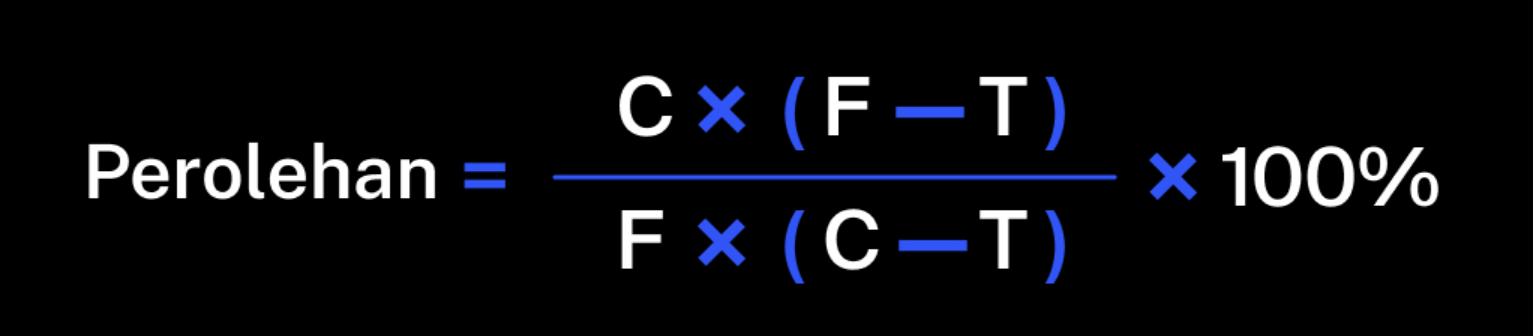

- C — persentase emas dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)
- F — persentase emas dalam feed sebelum proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/ dalam konsentrat tepat setelah proses flotasi (untuk menemukan perolehan konsentrat akhir)
- T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi (untuk menemukan perolehan konsentrat yang lebih kasar)/setelah dilakukan pemurnian (untuk menemukan perolehan konsentrat akhir)

In [16]:
# calculate the recovery
# Defining a function to calculate output
def calculate_output(c, f, t):
    cft = c * (f - t)
    fct = f * (c - t)
    output = (cft / fct) * 100
    return output

In [17]:
# Getting actual output amount
# and storing the values in a new dataframe

## Creating a new dataframe
df_output = pd.DataFrame()

## Getting actual output from the training set
df_output['rougher.output.recovery'] = data_train['rougher.output.recovery']

## Predicting output and storing them in a new column
df_output['predicted_output'] = (data_train
                                 # Filtering out rows that don't have output
                                 [data_train['rougher.output.recovery'] != 0]
                                 .apply(
                                     # Applying the function to each row in the training set
                                        (lambda row: calculate_output(
                                                c=row['rougher.output.concentrate_au'],
                                                f=row['rougher.input.feed_au'],
                                                t=row['rougher.output.tail_au']
                                                                    )
                                        ),
                                         axis=1)
                                )

df_output

,rougher.output.recovery,predicted_output
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [43]:
# Checking for missing values
print(df_output.info())
print()

# Dropping missing values
df_output = df_output.dropna(axis=0)

print(len(df_output))
print(df_output.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15821 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  15821 non-null  float64
 1   predicted_output         13349 non-null  float64
dtypes: float64(2)
memory usage: 370.8 KB
None

13349
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13349 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  13349 non-null  float64
 1   predicted_output         13349 non-null  float64
dtypes: float64(2)
memory usage: 312.9 KB
None


In [44]:
# Calculating the mean absolute error
# between the actual and predicted values

MAE = mean_absolute_error(df_output['rougher.output.recovery'], df_output['predicted_output'])
print(MAE)

9.515615170907036e-15


Nilai MAE sangat kecil, sehingga kita dapat menyimpulkan bahwa rumus tersebut masih berlaku dalam situasi ini

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- halo kak tahapan ini ada sedikit kesalahan ya, seharusnya MAE nya itu sangat kecil sekali.
    - silahkan diskusikan dengan tutor/instructor nya

</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### The Changes in Metal Concentration

Kita lihat prosesnya kembali untuk memutuskan data mana yang akan kita proses
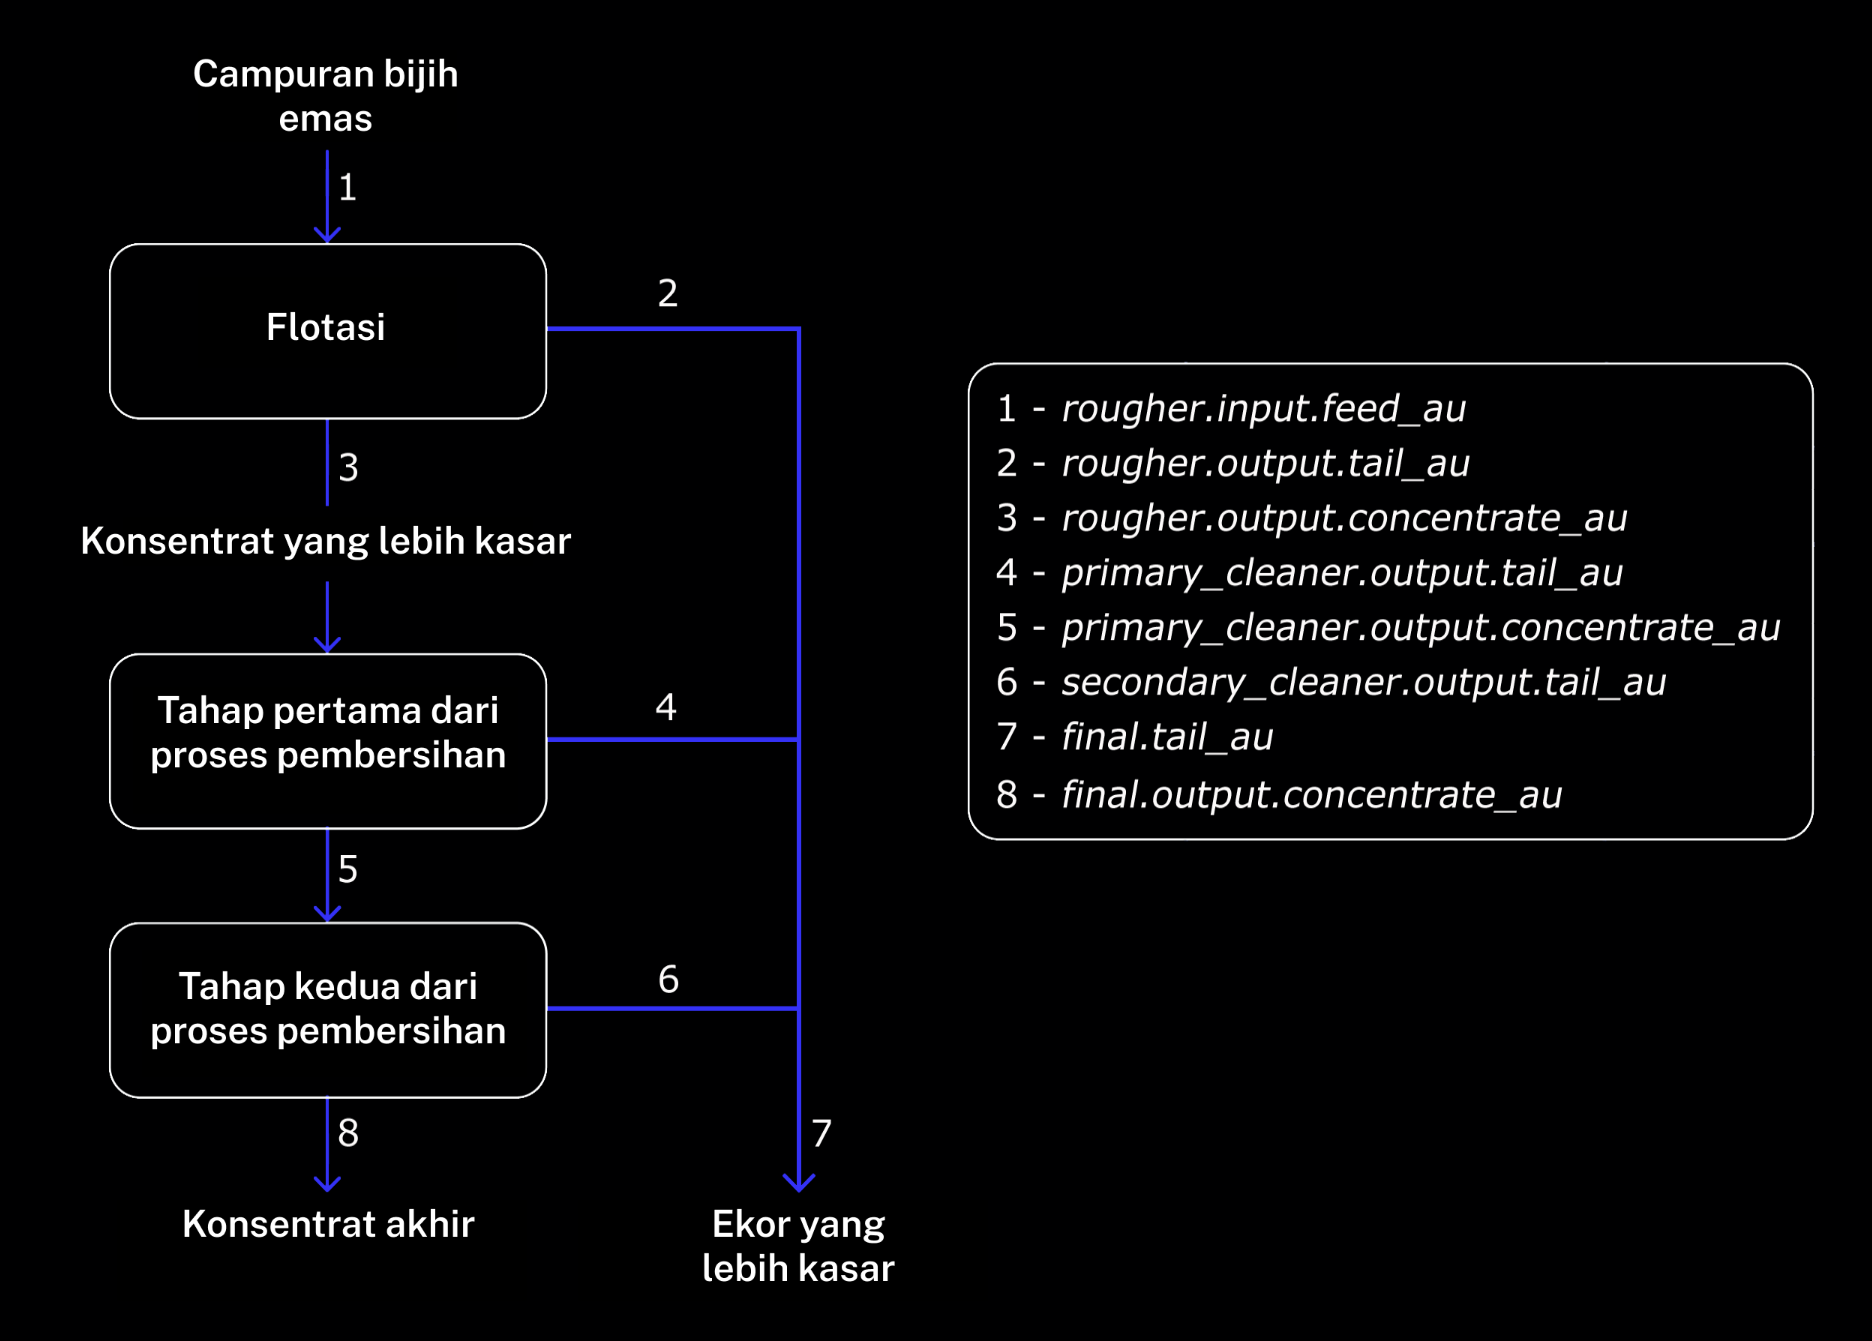

Kita hanya akan memilih kolom yang mengandung konsentrasi metal pada proses 1, 3, 5, dan, 8

#### Gold (Au)

In [18]:
# we just select columns that contains roger.input.feed, and concetrate_au
data_au = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_au|concentrate_au')]
display(data_au.head()), print
print('Data Au Shape', data_au.shape), print()
list(data_au.columns)

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.input.feed_au,rougher.output.concentrate_au
0,42.192020,34.174427,6.486150,19.793808
1,42.701629,34.118526,6.478583,20.050975
2,42.657501,33.969464,6.362222,19.737170
3,42.689819,28.260743,6.118189,19.320810
4,42.774141,33.044932,5.663707,19.216101


Data Au Shape (21639, 4)



['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au']

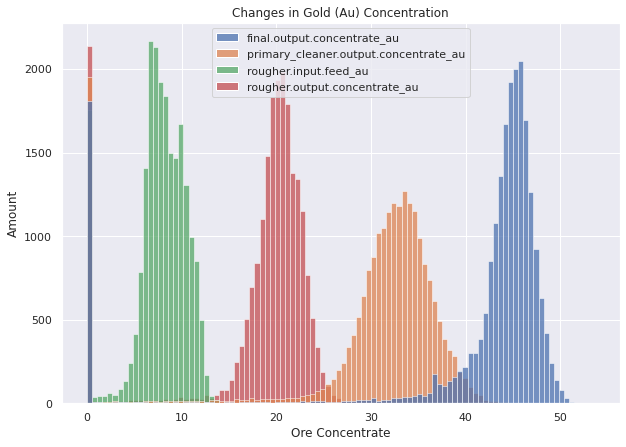

In [19]:
# create data_au plot
sns.set()

plt.figure(figsize=(10, 7))
sns.histplot(data_au, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Gold (Au) Concentration')
plt.show()

Jumlah konsentrasi bijih emas mengalami peningkatan seiring jumlah proses yang telah dilalui, dan kita tidak melihat adanya data yang janggal/outlier berdasarkan grafik diatas

#### Lead  (Pb)

In [20]:
# we just select columns that contains roger.input.feed, and concetrate_pb
data_pb = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_pb|concentrate_pb')]
display(data_pb.head()), print
print('Data Pb Shape', data_pb.shape), print()
list(data_pb.columns)

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,2.284912,7.101074
1,9.968944,10.497069,2.266033,7.278807
2,10.213995,10.354494,2.159622,7.216833
3,9.977019,8.496563,2.037807,7.175616
4,10.142511,9.986786,1.786875,7.240205


Data Pb Shape (21639, 4)



['final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_pb']

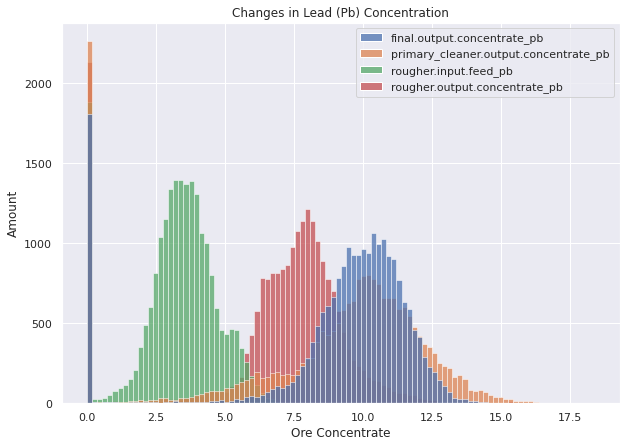

In [21]:
# create data_pb plot
sns.set()

plt.figure(figsize=(10, 7))
sns.histplot(data_pb, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Lead (Pb) Concentration')
plt.show()

Jumlah konsentrasi bijih timbal semakin bertambah seiring proses, dimana pada proses ke 3 dan terakhir jumlah perbedaannya tidak signifikan

#### Silver (Ag)

In [22]:
# we just select columns that contains roger.input.feed, and concetrate_ag
data_ag = data_full.loc[:, data_full.columns.str.contains('rougher.input.feed_ag|concentrate_ag')]
display(data_ag.head()), print
print('Data Ag Shape', data_ag.shape), print()
list(data_ag.columns)

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,6.100378,11.500771
1,6.029369,8.558743,6.161113,11.615865
2,6.055926,8.603505,6.116455,11.695753
3,6.047977,7.221879,6.043309,11.915047
4,6.148599,9.089428,6.060915,12.411054


Data Ag Shape (21639, 4)



['final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_ag']

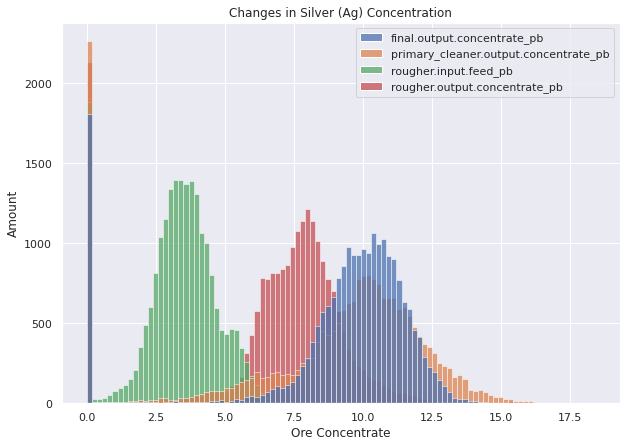

In [23]:
# create data_pb plot
sns.set()

plt.figure(figsize=(10, 7))
sns.histplot(data_pb, bins=100)
plt.xlabel('Ore Concentrate')
plt.ylabel('Amount')
plt.title('Changes in Silver (Ag) Concentration')
plt.show()

Jumlah konsentrasi bijih perak semakin bertambah seiring proses, dimana pada proses ke 3 dan terakhir jumlah perbedaannya tidak signifikan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#### Compare the Feed Particle Size

In [24]:
# filter the data
train_feed = data_train.loc[:, 'rougher.input.feed_size']
test_feed = data_test.loc[:, 'rougher.input.feed_size']

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


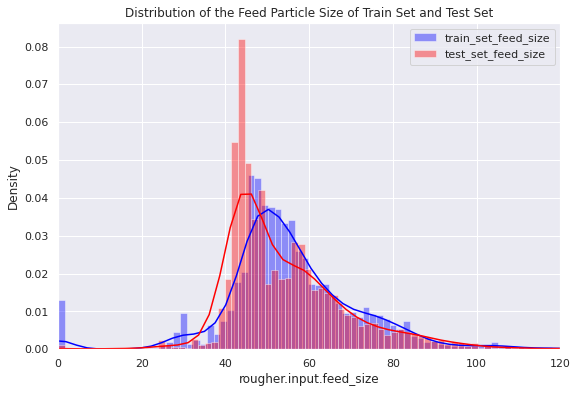

In [25]:
# create the chart of feed size
plt.figure(figsize=(9, 6))
plt.xlim(0, 120)
plt.title('Distribution of the Feed Particle Size of Train Set and Test Set')
sns.distplot(train_feed, bins=300, color='blue', label='train_set_feed_size')
sns.distplot(test_feed, bins=300, color='red', label='test_set_feed_size')
plt.legend()
plt.show()

Secara umum, distribusi dari rougher .input pada train_set dan test_set adalah mirip

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#### Distribution of the total Concentrations

Kita akan melihat distribusi konsentrasi pada tahapan yang berbeda dari : rougher input concentrate , rougher output concentrate, and final concentrate.

##### Rougher Input Concentrate

In [26]:
# distribution total rougher.input.concentrate
rougher_input = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('rougher.input.feed_')))]
rougher_input['total'] = rougher_input.copy().sum(axis=1)
display(rougher_input.head()), print

print(rougher_input.shape), print()
list(rougher_input.columns)

/tmp/ipykernel_51/3704670034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_input['total'] = rougher_input.copy().sum(axis=1)


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,total
0,6.100378,2.284912,36.808594,6.486150,51.680034
1,6.161113,2.266033,35.753385,6.478583,50.659114
2,6.116455,2.159622,35.971630,6.362222,50.609929
3,6.043309,2.037807,36.862241,6.118189,51.061546
4,6.060915,1.786875,34.347666,5.663707,47.859163


(21639, 5)



['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'total']

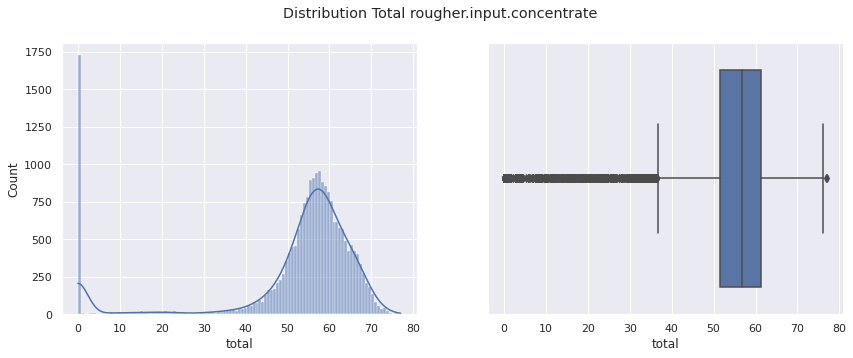

In [27]:
# create chart of the distribution rougher.input.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=rougher_input, x=rougher_input['total'], kde=True, ax=axes[0])
sns.boxplot(data=rougher_input, x=rougher_input['total'], ax=axes[1])

fig.suptitle('Distribution Total rougher.input.concentrate')
plt.show()

##### Rougher Output Concentrate

In [28]:
# distribution total rougher.output.concentrate
rougher_output = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('rougher.output.concentrate_')))]
rougher_output['total'] = rougher_output.copy().sum(axis=1)
display(rougher_output.head()), print

print(rougher_output.shape), print()
list(rougher_output.columns)

/tmp/ipykernel_51/1490250657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_output['total'] = rougher_output.copy().sum(axis=1)


,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,total
0,11.500771,7.101074,28.029297,19.793808,66.424950
1,11.615865,7.278807,28.067063,20.050975,67.012710
2,11.695753,7.216833,27.454037,19.737170,66.103793
3,11.915047,7.175616,27.341277,19.320810,65.752751
4,12.411054,7.240205,27.041023,19.216101,65.908382


(21639, 5)



['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'total']

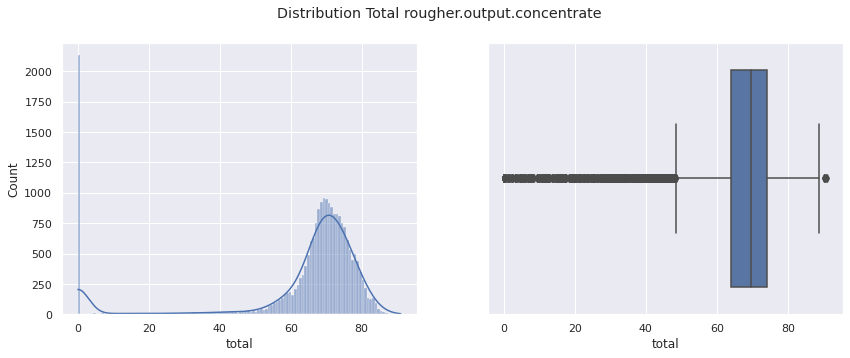

In [29]:
# create chart of the distribution rougher.output.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=rougher_output, x=rougher_output['total'], kde=True, ax=axes[0])
sns.boxplot(data=rougher_output, x=rougher_output['total'], ax=axes[1])

fig.suptitle('Distribution Total rougher.output.concentrate')
plt.show()

##### Final Concentrate

In [30]:
# distribution total final.output.concentrate
final_output = data_full.loc[:, ((~data_full.columns.str.contains('_size|_rate')) & (data_full.columns.str.contains('final.output.concentrate_')))]
final_output['total'] = final_output.copy().sum(axis=1)
display(final_output.head()), print

print(final_output.shape), print()
list(final_output.columns)

/tmp/ipykernel_51/2789555727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_output['total'] = final_output.copy().sum(axis=1)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,total
0,6.055403,9.889648,5.507324,42.192020,63.644396
1,6.029369,9.968944,5.257781,42.701629,63.957723
2,6.055926,10.213995,5.383759,42.657501,64.311180
3,6.047977,9.977019,4.858634,42.689819,63.573449
4,6.148599,10.142511,4.939416,42.774141,64.004667


(21639, 5)



['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'total']

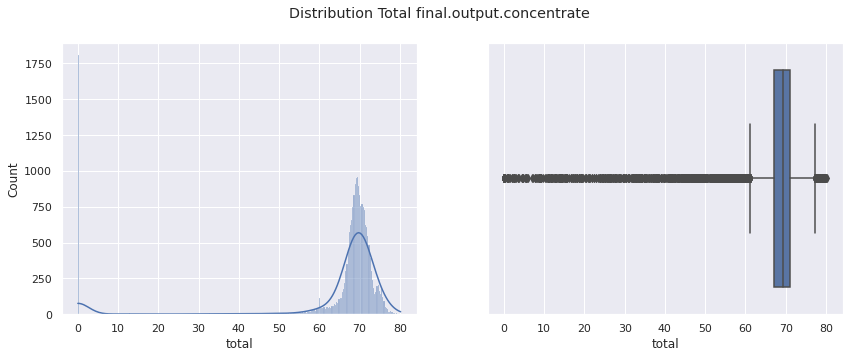

In [31]:
# create chart of the distribution final.output.concentrate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=final_output, x=final_output['total'], kde=True, ax=axes[0])
sns.boxplot(data=final_output, x=final_output['total'], ax=axes[1])

fig.suptitle('Distribution Total final.output.concentrate')
plt.show()

Berdasarkan grafik jumlah konsentrasi terdistribusi secara normal, jumlahnya meningkat sesuai tahapan yang dilalui oleh berbagai bijih konsentrat kecuali nilai 0 yang banyak karena berasal dari data yang hilang. Oleh sebabitu kita akan menghilangkan nilai 0 tersebut

##### Remove Abnormal Values

In [32]:
# filter columns for remove abnormal values
input_concentrate = list(rougher_input.drop(['total'], axis=1))
output_concentrate = list(rougher_output.drop(['total'], axis=1))
final_concentrate = list(final_output.drop(['total'], axis=1))

all_concentrate = []

for out in [input_concentrate, output_concentrate, final_concentrate]:
    all_concentrate.extend(out)

all_concentrate

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au']

In [33]:
# remove abnormal value
data_train = data_train.loc[(data_train[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

data_test = data_test.loc[(data_test[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

data_full = data_full.loc[(data_full[all_concentrate] != 0).all(axis=1)].reset_index(drop=True)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Model

###  Features and target separation

Kita perlu memisah dataset menjadi features dan target

In [34]:
# Separating features from target
train_features = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
test_features = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

train_targets = data_train[['rougher.output.recovery', 'final.output.recovery']]
test_targets = data_test[['rougher.output.recovery', 'final.output.recovery']]

### Standardization

Karena sebagian besar features diukur dalam metrik yang berbeda, kita perlu menskalakan data untuk memastikan bahwa model kita tidak terlalu mementingkan fitur dengan angka yang lebih besar.
Kita akan menggunakan standardisasi untuk menskalakan features. Pilihan ini disebabkan karena normalisasi digunakan ketika algoritma tidak membuat asumsi apapun mengenai sebaran data, sedangkan standarisasi digunakan ketika algoritma mengasumsikan sebaran data tertentu. Regresi linier mengasumsikan bahwa data terdistribusi secara normal, sehingga standardisasi akan memberikan tujuan kita dengan lebih baik.

In [35]:
# Creating a standard scaler instance
standard_scaler = StandardScaler()

# Fitting the scaler to the training set
# and transforming the set
train_features = pd.DataFrame(standard_scaler.fit_transform(X=train_features.values), columns=train_features.columns)

# Transforming the test features
test_features = pd.DataFrame(standard_scaler.fit_transform(X=test_features.values), columns=test_features.columns)

### Defining the metric functions

Klien kita membutuhkan kita untuk menggunakan metrik sMAPE (symmetric Mean Absolute Percentage Error)
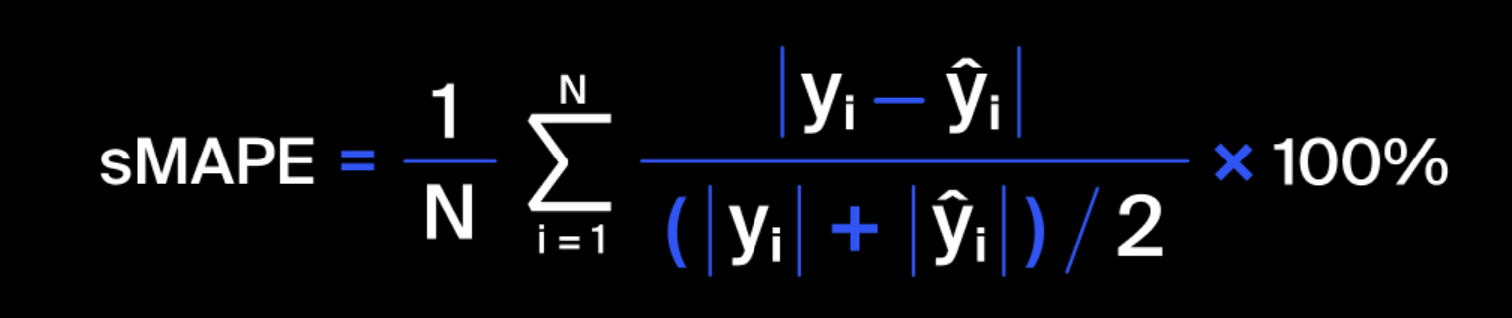

- yi = Nilai target untuk observasi dengan indeks i dalam set yang digunakan untuk mengukur kualitas.
- y^i = Nilai prediksi untuk observasi dengan indeks i, misalnya, dalam sampel uji atau test sample.
- N = Jumlah observasi pada sampel.

Kita perlu memprediksi dua nilai:

- Perolehan konsentrat yang lebih kasar rougher.output.recovery
- Perolehan konsentrat akhir final.output.recovery

Metrik terakhir mencakup dua nilai:
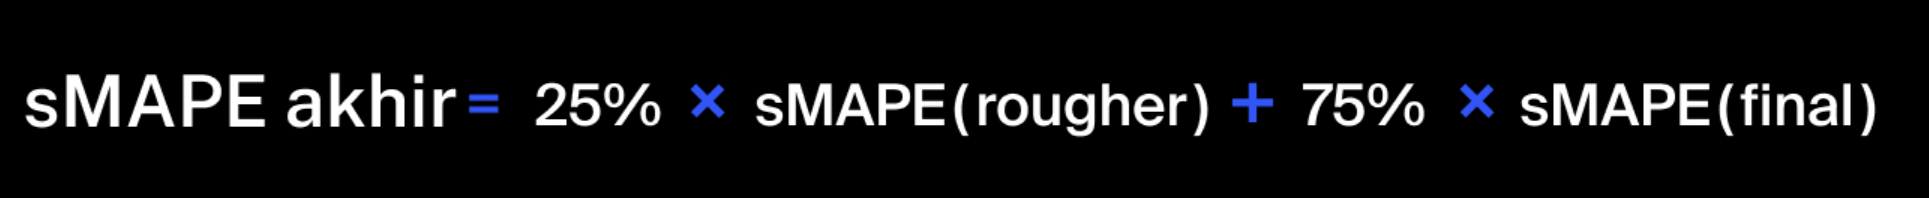

In [36]:
# Creating a dummy variable for datatype condition
arr = np.array([1, 2, 3])

def smape(target, pred):
    # Resetting the pred type of numpy.ndarray
    # back into a dataframe
    if type(pred) == type(arr):
        pred = pd.DataFrame(pred, columns=target.columns)
    
    # sMAPE(rougher)
    smape_rougher = np.mean(
                            (np.abs(target.iloc[:, 0] - pred.iloc[:, 0])) /
                            ((np.abs(target.iloc[:, 0]) + np.abs(pred.iloc[:, 0])) / 2) 
                            ) * 100
    # sMAPE(final)
    smape_final = np.mean(
                            (np.abs(target.iloc[:, 1] - pred.iloc[:, 1])) /
                            ((np.abs(target.iloc[:, 1]) + np.abs(pred.iloc[:, 1])) / 2) 
                            ) * 100
    
    # combined sMAPE
    combined_smape = (0.25 * smape_rougher) + (0.75 * smape_final)
    
    return combined_smape

# Integrating the function into sklearn
smape_scorer = make_scorer(smape, greater_is_better=False)
# Testing the function with a dummy prediction
# Score should be 0 since the values are exactly the same
smape(test_targets, test_targets)

0.0

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Training and validation

Kita tidak diberikan validation set, jadi kita akan memvalidasi model dengan menggunakan cross validation

In [37]:
# Defining a function to train and cross-validate models
def score_model(model, cv=10):
    # Creating an empty list to store scores
    scores = []
    
    # Getting indices of the subtrain and valid indices 
    # Splitting the dataset `cv` times 
    for subtrain_index, valid_index in KFold(n_splits=cv).split(train_features):
        # Defining subtraining and validation sets
        subtrain_features = train_features.loc[subtrain_index].reset_index(drop=True)
        subtrain_targets = train_targets.loc[subtrain_index].reset_index(drop=True)
        valid_features = train_features.loc[valid_index].reset_index(drop=True)
        valid_targets = train_targets.loc[valid_index].reset_index(drop=True)
        
        model.fit(subtrain_features, subtrain_targets)
        pred_valid = pd.DataFrame(model.predict(valid_features))
        
        scores.append(mean_absolute_error(valid_targets, pred_valid))
        
    return pd.Series(scores).mean()

In [38]:
# Linear regression
lr = LinearRegression()
lr_score = score_model(lr)
print("Linear regression mean validation score:", lr_score)

Linear regression mean validation score: 6.126598167711452


In [39]:
# Decision tree
## Creating an empty variable to store scores and models
best_dt = None
best_dt_score = 0

## Tuning hyperparameters
for depth in range(1, 11):
    dt = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    # Training & getting validation scores
    score = score_model(dt)
    
    # Storing the best score and model
    if score > best_dt_score:
        best_dt_score = score
        best_dt = dt

print('Best decision tree score:', best_dt_score)
print('Best model:', best_dt)

Best decision tree score: 7.239782248337091
Best model: DecisionTreeRegressor(max_depth=1, random_state=12345)


Hasil dari linear regression lebih baik, jadi kita akan menggunakannya

### Testing

In [40]:
lr = LinearRegression()
lr.fit(train_features, train_targets)
pred = lr.predict(test_features)
smape(test_targets, pred)

10.545229043318756

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Conclusion

- Setelah merunningkan dataset, kita menjumpai tipe data 'date' tidak sesuai dan kita menggantinya dengan type data datetime
- Terdapat beberapa kolom yang hilang pada data_test kemudian kita proses dengan cara menggabungkan dari data_full, karena data_full merupakan gabungan dari data_train dan data_test
- Terdapat beberapa nilai yang hilang, kita gantikan nilai yang hilang tersebut dengan 0
- Kita mencek perubahan konsentrasi logam pada tiap tahapan proses sesuai dengan diagram alir, dan melihat persebaran distribusinya
- Kita membagi dataset menjadi2 yakni features dan target, dan melakukan standarisasi
- Kita melatih model dengan menggunakan cross validation
- Dan yang terakhir melakukan test berdasarkan model yang kita pilih yakni linear regression, dan mendapat nilai akhir sMAE sebesar ~10%, dimana hasilnya sudah baik untuk kita gunakan sebagai model